# ランダムフォレストによる特徴選択

ランダムフォレストの各決定木における不純度の平均的な減少量に基づいて、各特徴の重要度が計算できる。ただし特徴の相関が高い場合には、一方の重要度が高く、他方が低くなることもある。特徴選択に用いるだけなら問題ない。

## 使用方法

### データの準備

In [1]:
from sklearn.datasets import load_breast_cancer

loader = load_breast_cancer()
X, y = loader.data, loader.target

### 学習

In [2]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

### 可視化

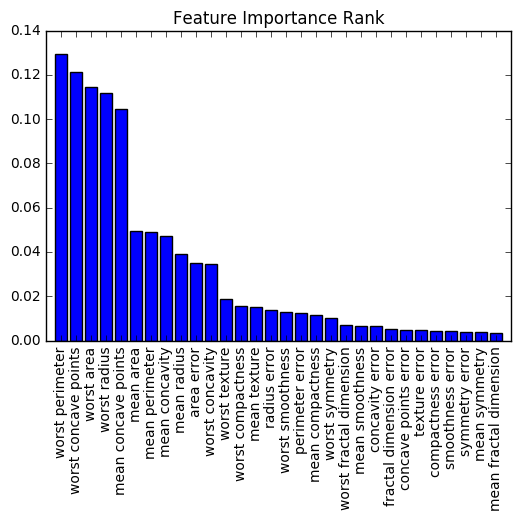

In [3]:
import numpy as np
import matplotlib.pyplot as plt

features = loader.feature_names
n_feature = len(features)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importance Rank')
plt.bar(np.arange(n_feature), importances[indices], align='center')

plt.xlim(-1, n_feature)
plt.xticks(np.arange(n_feature), features[indices], rotation=90)

plt.show()

### 特徴の選択

In [4]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, threshold=0.06, prefit=True)
X_new = selector.transform(X)
X_new.shape

(569, 5)